<a href="https://colab.research.google.com/github/ajtamayoh/Spoon-Knife/blob/master/T%C3%B3picos_Especiales_en_Algoritmos_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Tópicos Especiales en Algoritmos**

### Ingeniería de Sistemas

### Facultad de Ingeniería

### Universidad de Medellín

### Prof. Antonio Tamayo Herrera

### 2019-1

## Aprendizaje no supervisado - Clustering

## K-**Means**

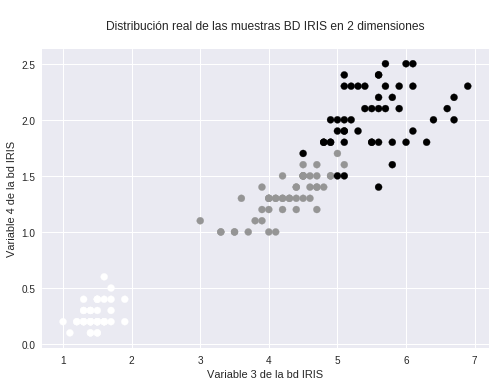



Descubriendo las clases con el método kMeans


Descubriendo 1 clusters:



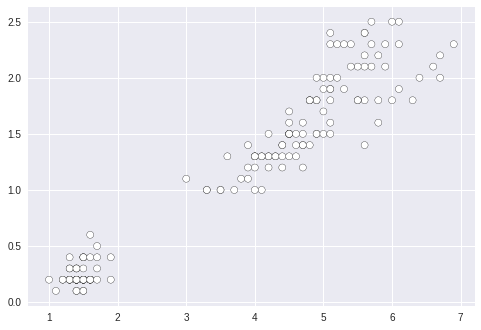

Descubriendo 2 clusters:



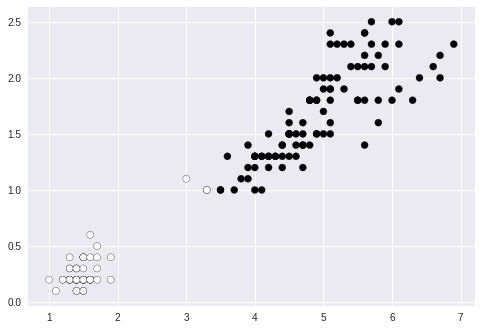

Descubriendo 3 clusters:



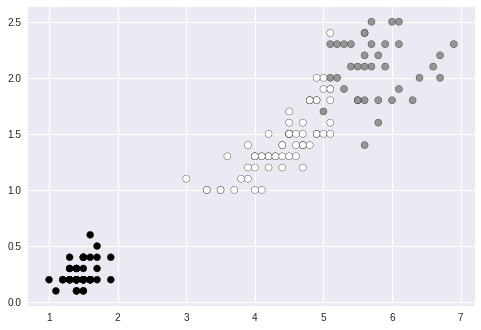

Descubriendo 4 clusters:



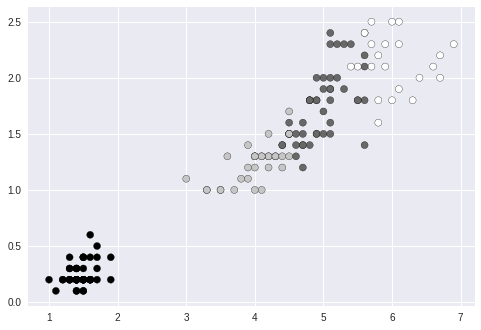

Descubriendo 5 clusters:



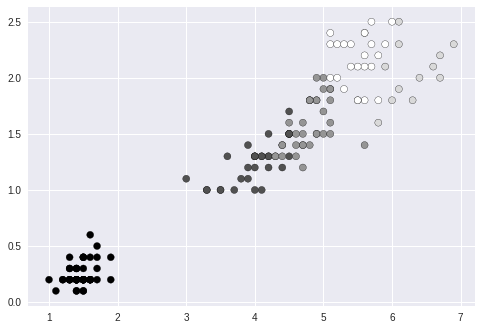

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans
from sklearn import datasets

iris = datasets.load_iris()
X, y = iris.data, iris.target

plt.scatter(X[:,2], X[:,3], c=y)
plt.title(u'\nDistribución real de las muestras BD IRIS en 2 dimensiones\n')
plt.xlabel('Variable 3 de la bd IRIS')
plt.ylabel('Variable 4 de la bd IRIS')
plt.show()

print('\n\nDescubriendo las clases con el método kMeans\n\n')

for k in range(1,6,1):
    
    print('Descubriendo ' + str(k) + ' clusters:\n')
    #Complete el código llamando al método KMeans usando inicialización de los centroides de manera aleatoria
    #usando las muestras de entrenamiento, tal como lo explicamos en clase. Use el algorímo EM para el
    #Entrenamiento
    kmeans = KMeans(n_clusters=k, init='random', n_init=1, max_iter=300, tol=0.0001, precompute_distances='auto', verbose=0, random_state=None, copy_x=True, n_jobs=1, algorithm='full').fit(X)
    labels = kmeans.labels_
    plt.scatter(X[:,2], X[:,3], c=labels.astype(np.float), edgecolor='k')
    plt.show()

## **GMMs**

In [3]:
from __future__ import division
import matplotlib as mpl
import matplotlib.pyplot as plt

import numpy as np

from sklearn import datasets
from sklearn.mixture import GaussianMixture
from sklearn.model_selection import StratifiedKFold

def class_error(y_est, y_real):
    err = 0
    for y_e, y_r in zip(y_est, y_real):
        if y_e != y_r:
            err += 1

    return "accuracy: " + str(1-(err/np.size(y_est)))


iris = datasets.load_iris()

#Partiendo la base de datos de entrenamiento en 75% para entrenar y 25% para validar
skf = StratifiedKFold(n_splits=4)
# Tomando solo el primer fold
train_index, test_index = next(iter(skf.split(iris.data, iris.target)))


X_train = iris.data[train_index]
y_train = iris.target[train_index]
X_test = iris.data[test_index]
y_test = iris.target[test_index]

#n_classes = len(np.unique(y_train))
n_classes = 3
#Complete el código aquí con la llamada al método GaussianMixture. Recuerde 
#que ya tiene el número de Gaussianas en n_classes
estimator = GaussianMixture(n_components=n_classes, covariance_type='full', max_iter=20, random_state=0)

#Con la base de datos se realiza una inicialización de las medias de cada Gaussiana de manera supervisada
estimator.means_init = np.array([X_train[y_train == i].mean(axis=0)
                                    for i in range(n_classes)])

#Complete el codigo aqui entrenando (ajustando) el modelo con la base de datos de entrenamiento
estimator.fit(X_train)
    
print ("Eficiencia en la fase de entrenamiento:")
y_train_pred = estimator.predict(X_train)
train_accuracy = np.mean(y_train_pred.ravel() == y_train.ravel()) * 100
print (train_accuracy)

print ("\nEficiencia en la fase de validación:")
#Complete el código aquí prediciendo el la clase para las muestras de validación
y_test_pred = estimator.predict(X_test)
test_accuracy = np.mean(y_test_pred.ravel() == y_test.ravel()) * 100
print (test_accuracy)

print ("\n")
print (class_error(y_test_pred, y_test))


Eficiencia en la fase de entrenamiento:
94.5945945945946

Eficiencia en la fase de validación:
97.43589743589743


accuracy: 0.9743589743589743


## Clustering jerá**rquico**

**Aglomerativo**

Este agrupamiento produce un conjunto de grupos anidados, organizados en un árbol jerárquico, que puede ser visualizado como un dendograma.

En el clustering jerárquico aglomerativo (contratio a lo que ocurre en el divisivo), cada muestra comienza formando su propio cluster, cada uno de una muestra. Luego, de manera sucesiva, se van agrupando las muestras más cercanas para formar nuevos clusters, más grandes en cada iteración. 

El algoritmo es el siguiente:

1. Encontrar los dos grupos más cercanas en el espacio de características (en la primera iteración los grupos son conformados por una muestra cada uno) y agruparlos. La distancia entre los grupos puede ser medida de tres formas distintas:

          1.1. Distancia euclidiana entre los centroides de los grupos.

          1.2. Distancia más corta entre todos los posibles pares de muestras de ambos grupos (single-link clustering)

          1.3. Distancia más grande entre todos los posibles pares de muestras de ambos grupos (complete-link clustering)

2. Repetir el proceso para las dos siguientes características más cercanas y hacerlo hasta construir un solo cluster.

Nota: Si se va a usar la distancia entre centroides de los grupos, cada nuevo grupo creado debe ser representado por su centroide o valor medio de las muestras que lo componen.

La estructura de árbole (de abajo hacia arriba) que resulta de este método, se conoce como dendograma.

# **Ejercicios de clase**

1. Graficar el siguiente conjunto de datos: $data = \{1,3,4,9,10,13,21,23,28,29\}$

2. Usando k-means (manualmente), agrupar en dos clusters el conjunto de datos anterior.

3. Usando clustering jerárquico aglomerativo, construir el árbol jerárquico de agrupamiento para el conjunto de datos anterior.

4. Consultar, comprender e implementar el clustering jerárquico aglomerativo para resolver el agrupamiento del anterior conjunto de datos. 

Documentación: https://scikit-learn.org/stable/modules/generated/sklearn.cluster.AgglomerativeClustering.html

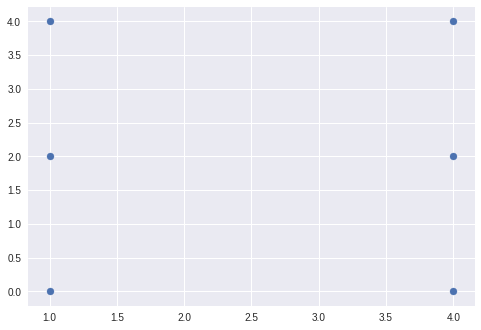

array([0, 0, 1, 0, 0, 1])

In [26]:
from sklearn.cluster import AgglomerativeClustering
import numpy as np
import matplotlib.pyplot as plt
x = [1,1,1,4,4,4]
y = [2,4,0,2,4,0]
X = np.array([[1, 2], [1, 4], [1, 0], [4, 2], [4, 4], [4, 0]])
clustering = AgglomerativeClustering(n_clusters=2, affinity='euclidean', memory=None, connectivity=None, compute_full_tree='auto', linkage='complete', pooling_func='deprecated').fit(X)
plt.scatter(x,y)
plt.show()
clustering
clustering.labels_

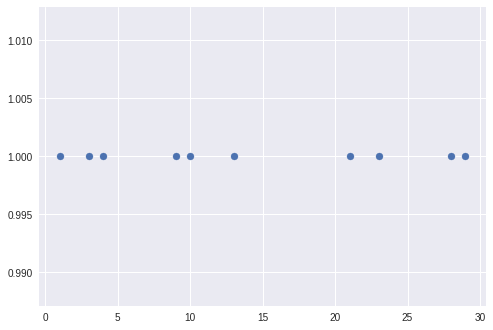

array([3, 3, 3, 0, 0, 0, 1, 1, 2, 2])

In [25]:
from sklearn.cluster import AgglomerativeClustering
import numpy as np
import matplotlib.pyplot as plt
data1 = [1,3,4,9,10,13,21,23,28,29]
y = [1,1,1,1,1,1,1,1,1,1]
data = [[1],[3],[4],[9],[10],[13],[21],[23],[28],[29]]
clustering = AgglomerativeClustering(n_clusters=4, affinity='euclidean', memory=None, connectivity=None, compute_full_tree='auto', linkage='single', pooling_func='deprecated').fit(data)
plt.scatter(data1,y)
plt.show()
clustering
clustering.labels_

## **Ejercicio**

Consultar en la siguiente documentación:

https://docs.scipy.org/doc/scipy/reference/generated/scipy.cluster.hierarchy.dendrogram.html

Cómo dibujar el dendograma para el ejercicio de clustering jerárquico aglomerativo del ejercicio anterior.

## **Ejercicio**

Usando k-means y clustering jerárquico, realizar el agrupamiento sobre la base de datos de twits: https://archive.ics.uci.edu/ml/datasets/Health+News+in+Twitter

# **Fuzzy C-means**


En el algoritmo K-Means los datos son agrupados en clusters sin solapamiento, cada cluster representado por un centroide, por lo que cada muestra pertenece a un único grupo. En el agrupamiento borroso (Fuzzy clustering) cada muestra puede pertenecer a más de un cluster y tendrá un peso, $w_{ij}$.  que representará la asociación de cada muestra $x_i$ a cada cluster $C_j$. Los pesos $w_{ij}$ toman valores entre 0 y 1 y la suma de todos los pesos asociados a una muestra deben sumar 1 en total.

El algoritmo más ampliamente usado para el agrupamiento borroso se conoce como Fuzzy c-means (Bezdek, 1981) y es una generalización directa del algoritmo K-means. 

En f-fuzzy c-means, el centroide de un cluster, $c_j$, es el ponderado de todos los puntos, ponderados por su peso o grado de pertenencia a ese grupo particular: El peso de la asociación está inversamente relacionado con la distancia del objeto al centro del clúster.

El algoritmo consiste en el siguiente esquema iterativo:

1. Seleccionar un número $k$ de clusters y asignar de forma aleatoria los pesos $w_{ij}$ correspondientes a cada uno de las $m$ muestras de la base de datos.

2. Calcular el centroide de cada cluster, $c_j$, así:

$$ c_j =  \frac{\sum_{i=1}^{m}w_{ij}^{p}x_i} {\sum_{i=1}^{m}w_{ij}^{p}}  $$

3. Para cada muestra actualizar sus pesos de tal forma que se minimice la siguiente función:

$$ SSE(C_1,C_2, ..., C_k) = \sum_{j=1}^{k} \sum_{i=1}^{m} w_{ij}^{p}dist(x_i,c_j)^2 $$

Sujeto a la restricción de que la suma de todos los pesos para una muestra en particular debe ser igual a 1. $p$, es un exponente, que toma valores entre 1 e infinito, y determina la influencia de los pesos, y por tanto, el nivel de borrosidad de los clusters. Valores grandes de $p$ determinan baja influencia de los pesos y por tanto clusters borrosos. Regularmente, $p$ es inicializado en $2$, si $p$ es cercano a $1$, los pesos convergen a 0 o 1 y el método se comporta como k-means.

4. Finalmente, retornar al paso 2 hasta alcanzar convergencia. (Se converge cuando el cambio en los pesos sea menor que algún umbral bajo fijado previamente)

In [2]:
!pip install -U scikit-fuzzy

    100% |████████████████████████████████| 1.0MB 18.5MB/s 
  Stored in directory: /root/.cache/pip/wheels/9d/f9/0e/a8de3e98e64bbf828f5e762936ff5a40e72331dbe663470711
Successfully built scikit-fuzzy


Text(0.5, 1.0, 'Test data: 200 points x3 clusters.')

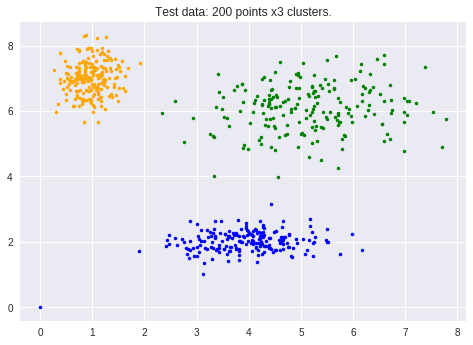

In [3]:
from __future__ import division, print_function
import numpy as np
import matplotlib.pyplot as plt
import skfuzzy as fuzz

colors = ['b', 'orange', 'g', 'r', 'c', 'm', 'y', 'k', 'Brown', 'ForestGreen']

# Define three cluster centers
centers = [[4, 2],
           [1, 7],
           [5, 6]]

# Define three cluster sigmas in x and y, respectively
sigmas = [[0.8, 0.3],
          [0.3, 0.5],
          [1.1, 0.7]]

# Generate test data
np.random.seed(42)  # Set seed for reproducibility
xpts = np.zeros(1)
ypts = np.zeros(1)
labels = np.zeros(1)
for i, ((xmu, ymu), (xsigma, ysigma)) in enumerate(zip(centers, sigmas)):
    xpts = np.hstack((xpts, np.random.standard_normal(200) * xsigma + xmu))
    ypts = np.hstack((ypts, np.random.standard_normal(200) * ysigma + ymu))
    labels = np.hstack((labels, np.ones(200) * i))

# Visualize the test data
fig0, ax0 = plt.subplots()
for label in range(3):
    ax0.plot(xpts[labels == label], ypts[labels == label], '.',
             color=colors[label])
ax0.set_title('Test data: 200 points x3 clusters.')

# **Ejercicio de consulta**

Usando la librería skfuzzy resolver el problema de agrupamiento para la base de datos IRIS.